In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('..')
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiPoint

In [2]:
GAS_STATIONS_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Tankstellen.csv')
gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=';', names=['id', 'Name', 'Company', 'Street', 'House_Number', 'Postalcode', 'City', 'Lat', 'Long'],index_col='id')

In [3]:
gas_stations_df['Position'] = gas_stations_df.apply(lambda row: Point(row.Long, row.Lat), axis=1)

In [112]:
gas_stations_df.head(3)

,Name,Company,Street,House_Number,Postalcode,City,Lat,Long,Position
id,,,,,,,,,
1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530,POINT (8.42953 55.01589)
2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741,POINT (8.308740999999999 54.90746800000001)
3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700,POINT (8.310700000000001 54.9044)


In [4]:
positions = gpd.GeoSeries(gas_stations_df['Position'])

### Bounding Box Approach 

In [15]:
def get_gas_stations_in_area(bounding_box):
    """ bounding box is a (minx, miny, maxx, maxy) tuple""" # x = long, y = lat
    min_long, min_lat,  max_long, max_lat = bounding_box
    assert min_long < max_long
    assert min_lat < max_lat
    return set(positions.cx[min_long:max_long,min_lat:max_lat].index)

In [6]:
def get_gas_stations_in_boxes(bounding_boxes):
    ids = [get_gas_stations_in_area(box) for box in bounding_boxes]
    return list(set.union(*ids))

In [26]:
boxes_potsdam_berlin = [((52.34416775186111, 13.092272842330203), (52.35864093016666, 13.187254280776756)),((52.35864093016666, 13.044782123106984), (52.37311410847222, 13.187254280776756)),((52.37311410847222, 13.021036763495317), (52.38758728677778, 13.210999640388309)),((52.38758728677778, 13.021036763495317), (52.41653364338889, 13.234744999999975)),((52.41653364338889, 13.139763561553536), (52.431006821694446, 13.234744999999975)),((52.431006821694446, 13.16350892116509), (52.44548, 13.258490359611642)),((52.44548, 13.16350892116509), (52.459953178305554, 13.282235719223195)),((52.459953178305554, 13.16350892116509), (52.474426356611126, 13.305981078834861)),((52.474426356611126, 13.187254280776756), (52.48889953491667, 13.305981078834861)),((52.48889953491667, 13.210999640388309), (52.503372713222234, 13.424707876892967)),((52.503372713222234, 13.234744999999975), (52.53231906983335, 13.448453236504633)),((52.53231906983335, 13.35347179805808), (52.5467922481389, 13.448453236504633))]
boxes_small_potsdam_berlin = [((52.380350697625, 13.044782123106984), (52.40206046508334, 13.068527482718537)),((52.37311410847222, 13.068527482718537), (52.40206046508334, 13.080400162524484)),((52.36587751931945, 13.080400162524484), (52.40206046508334, 13.104145522136037)),((52.35864093016666, 13.104145522136037), (52.394823875930555, 13.11601820194187)),((52.35864093016666, 13.11601820194187), (52.38758728677778, 13.127890881747703)),((52.35864093016666, 13.127890881747703), (52.394823875930555, 13.139763561553536)),((52.35864093016666, 13.139763561553536), (52.40206046508334, 13.16350892116509)),((52.35864093016666, 13.16350892116509), (52.41653364338889, 13.175381600970923)),((52.380350697625, 13.175381600970923), (52.45271658915278, 13.187254280776756)),((52.380350697625, 13.187254280776756), (52.459953178305554, 13.19912696058259)),((52.394823875930555, 13.19912696058259), (52.467189767458336, 13.210999640388309)),((52.431006821694446, 13.210999640388309), (52.4816629457639, 13.222872320194142)),((52.43824341084722, 13.222872320194142), (52.48889953491667, 13.234744999999975)),((52.44548, 13.234744999999975), (52.49613612406946, 13.246617679805809)),((52.459953178305554, 13.246617679805809), (52.51060930237501, 13.258490359611642)),((52.467189767458336, 13.258490359611642), (52.517845891527784, 13.270363039417362)),((52.474426356611126, 13.270363039417362), (52.52508248068057, 13.282235719223195)),((52.48889953491667, 13.282235719223195), (52.52508248068057, 13.294108399029028)),((52.49613612406946, 13.294108399029028), (52.52508248068057, 13.305981078834861)),((52.503372713222234, 13.305981078834861), (52.52508248068057, 13.377217157669747)),((52.503372713222234, 13.377217157669747), (52.53231906983335, 13.412835197087134)),((52.51060930237501, 13.412835197087134), (52.53231906983335, 13.424707876892967))]

In [9]:
def js_box_2_python_box(js_boxes):
    return [(min_long, min_lat,  max_long, max_lat) for ((min_lat,min_long),(max_lat,max_long)) in js_boxes]

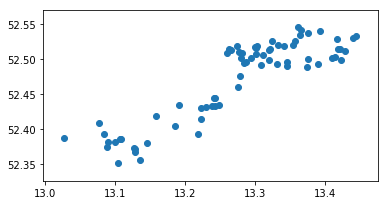

In [27]:
boxes_potsdam_berlin_nice = js_box_2_python_box(boxes_potsdam_berlin)
res = get_gas_stations_in_boxes(boxes_potsdam_berlin_nice)
gpd.GeoSeries(gas_stations_df.loc[res]['Position']).plot()

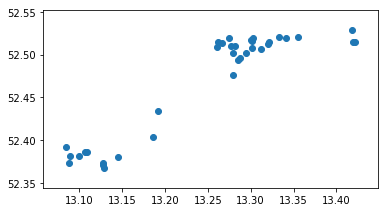

In [28]:
boxes_potsdam_berlin_nice = js_box_2_python_box(boxes_small_potsdam_berlin)
res = get_gas_stations_in_boxes(boxes_potsdam_berlin_nice)
gpd.GeoSeries(gas_stations_df.loc[res]['Position']).plot();

### Buffer Approach 

In [91]:
path_potsdam_berlin = [(52.390530000000005, 13.064540000000001),(52.39041, 13.065890000000001),(52.39025, 13.06723),(52.39002000000001, 13.068810000000001),(52.389970000000005, 13.069350000000002),(52.38998, 13.06948),(52.389860000000006, 13.07028),(52.38973000000001, 13.07103),(52.38935000000001, 13.07352),(52.3892, 13.07463),(52.38918, 13.075120000000002),(52.389210000000006, 13.07553),(52.389300000000006, 13.0759),(52.3894, 13.076130000000001),(52.389520000000005, 13.07624),(52.38965, 13.07638),(52.389880000000005, 13.0767),(52.390100000000004, 13.077110000000001),(52.390330000000006, 13.077770000000001),(52.390440000000005, 13.078660000000001),(52.39052, 13.079400000000001),(52.390570000000004, 13.08004),(52.39056000000001, 13.08037),(52.390550000000005, 13.0806),(52.390530000000005, 13.080990000000002),(52.390420000000006, 13.083100000000002),(52.390440000000005, 13.083400000000001),(52.39038000000001, 13.083430000000002),(52.39011000000001, 13.0836),(52.38853, 13.084660000000001),(52.38801, 13.0851),(52.38774, 13.085410000000001),(52.38754, 13.085730000000002),(52.38729000000001, 13.086300000000001),(52.38689, 13.087610000000002),(52.386500000000005, 13.088960000000002),(52.38611, 13.09026),(52.38602, 13.090700000000002),(52.3858, 13.09121),(52.385290000000005, 13.092300000000002),(52.38477, 13.09331),(52.384040000000006, 13.094650000000001),(52.383500000000005, 13.095670000000002),(52.38302, 13.096580000000001),(52.37538000000001, 13.110970000000002),(52.37485, 13.112020000000001),(52.37471000000001, 13.112340000000001),(52.37436, 13.113220000000002),(52.373990000000006, 13.114300000000002),(52.37379000000001, 13.11494),(52.373580000000004, 13.11578),(52.37304, 13.11809),(52.37266, 13.119740000000002),(52.37252, 13.120540000000002),(52.37238000000001, 13.121540000000001),(52.37227000000001, 13.122710000000001),(52.37225, 13.12311),(52.372220000000006, 13.12376),(52.372220000000006, 13.124830000000001),(52.372260000000004, 13.128100000000002),(52.37229000000001, 13.131340000000002),(52.37234, 13.1369),(52.37232, 13.13785),(52.37228, 13.13859),(52.37220000000001, 13.13958),(52.37216, 13.140500000000001),(52.372150000000005, 13.141950000000001),(52.37218000000001, 13.14399),(52.37228, 13.147120000000001),(52.3723, 13.14906),(52.37232, 13.151140000000002),(52.37228, 13.15149),(52.37225, 13.151850000000001),(52.37219, 13.152070000000002),(52.372130000000006, 13.152210000000002),(52.372040000000005, 13.152360000000002),(52.371930000000006, 13.15248),(52.37181, 13.152560000000001),(52.37167, 13.152600000000001),(52.37153000000001, 13.152600000000001),(52.3714, 13.152550000000002),(52.371300000000005, 13.15248),(52.3712, 13.152370000000001),(52.37106000000001, 13.152130000000001),(52.37098, 13.151840000000002),(52.37095000000001, 13.151560000000002),(52.370960000000004, 13.15136),(52.371, 13.151090000000002),(52.37109, 13.150830000000001),(52.3712, 13.15066),(52.37129, 13.15056),(52.371460000000006, 13.15046),(52.37163, 13.150430000000002),(52.37181, 13.150400000000001),(52.37322, 13.150360000000001),(52.373670000000004, 13.150350000000001),(52.37375, 13.15032),(52.37451, 13.150310000000001),(52.375710000000005, 13.15028),(52.37670000000001, 13.150250000000002),(52.376960000000004, 13.150250000000002),(52.37715000000001, 13.150220000000001),(52.37742, 13.150160000000001),(52.377720000000004, 13.15013),(52.378040000000006, 13.150120000000001),(52.37812, 13.15009),(52.37825, 13.15004),(52.378800000000005, 13.15004),(52.379270000000005, 13.15009),(52.37962, 13.150150000000002),(52.380010000000006, 13.150240000000002),(52.380370000000006, 13.150360000000001),(52.380990000000004, 13.150620000000002),(52.38165000000001, 13.15098),(52.383500000000005, 13.152170000000002),(52.38440000000001, 13.15277),(52.3858, 13.153670000000002),(52.387080000000005, 13.1545),(52.38745, 13.154760000000001),(52.38768, 13.15496),(52.38794000000001, 13.155190000000001),(52.388380000000005, 13.155660000000001),(52.38891, 13.156350000000002),(52.38927, 13.156920000000001),(52.38965, 13.15755),(52.38984000000001, 13.15792),(52.39011000000001, 13.158520000000001),(52.390460000000004, 13.15943),(52.39074, 13.160380000000002),(52.392900000000004, 13.169300000000002),(52.39408, 13.1742),(52.39439, 13.175370000000001),(52.394830000000006, 13.176800000000002),(52.395320000000005, 13.17805),(52.39578, 13.179070000000001),(52.39621, 13.17993),(52.39678000000001, 13.18092),(52.39714000000001, 13.18148),(52.3975, 13.181970000000002),(52.398340000000005, 13.183000000000002),(52.39922000000001, 13.184000000000001),(52.399530000000006, 13.18438),(52.40012, 13.18504),(52.400940000000006, 13.185910000000002),(52.40171, 13.186750000000002),(52.402260000000005, 13.187420000000001),(52.403830000000006, 13.18917),(52.407830000000004, 13.193690000000002),(52.40982, 13.19593),(52.410230000000006, 13.19631),(52.41085, 13.19678),(52.411280000000005, 13.197030000000002),(52.41158000000001, 13.197180000000001),(52.41223, 13.197420000000001),(52.412620000000004, 13.197510000000001),(52.413030000000006, 13.19757),(52.413880000000006, 13.19757),(52.41407, 13.197560000000001),(52.41452, 13.197470000000001),(52.41536000000001, 13.19729),(52.41561, 13.197210000000002),(52.416720000000005, 13.19697),(52.417570000000005, 13.196760000000001),(52.41827000000001, 13.196610000000002),(52.42042000000001, 13.196130000000002),(52.4217, 13.195850000000002),(52.422740000000005, 13.19561),(52.423030000000004, 13.195500000000001),(52.42322000000001, 13.195390000000002),(52.423410000000004, 13.195260000000001),(52.42360000000001, 13.195120000000001),(52.42381, 13.194930000000001),(52.42409000000001, 13.194640000000001),(52.42443, 13.194170000000002),(52.424820000000004, 13.1935),(52.425160000000005, 13.19293),(52.42549, 13.192450000000001),(52.425720000000005, 13.192160000000001),(52.42607, 13.191820000000002),(52.426300000000005, 13.191640000000001),(52.42649, 13.19152),(52.42685, 13.191350000000002),(52.427310000000006, 13.191230000000001),(52.427530000000004, 13.191210000000002),(52.427890000000005, 13.191230000000001),(52.42887, 13.191460000000001),(52.43121000000001, 13.19204),(52.43244000000001, 13.192340000000002),(52.43292, 13.19246),(52.433400000000006, 13.1926),(52.43365000000001, 13.19269),(52.43403000000001, 13.192870000000001),(52.434470000000005, 13.193150000000001),(52.43478, 13.19339),(52.43506000000001, 13.193650000000002),(52.435340000000004, 13.19396),(52.43573000000001, 13.194440000000002),(52.43797000000001, 13.197270000000001),(52.438610000000004, 13.198080000000001),(52.44021000000001, 13.2001),(52.44169, 13.20198),(52.44489, 13.206010000000001),(52.446180000000005, 13.207640000000001),(52.45031, 13.212860000000001),(52.47092000000001, 13.238930000000002),(52.472350000000006, 13.240730000000001),(52.47289000000001, 13.24136),(52.474680000000006, 13.243440000000001),(52.47838, 13.247610000000002),(52.48109, 13.250670000000001),(52.48225000000001, 13.25201),(52.482800000000005, 13.2527),(52.48602, 13.25679),(52.48906, 13.260610000000002),(52.491670000000006, 13.26392),(52.49271, 13.26524),(52.49497, 13.268040000000001),(52.495160000000006, 13.268360000000001),(52.495760000000004, 13.26917),(52.496280000000006, 13.26984),(52.497170000000004, 13.27105),(52.497840000000004, 13.27194),(52.49857, 13.272870000000001),(52.49895000000001, 13.273460000000002),(52.49916, 13.273930000000002),(52.49929, 13.27434),(52.499390000000005, 13.274840000000001),(52.499460000000006, 13.275440000000001),(52.49949, 13.275970000000001),(52.49956, 13.277550000000002),(52.49963, 13.27838),(52.49969, 13.278830000000001),(52.499770000000005, 13.27918),(52.499900000000004, 13.279630000000001),(52.500060000000005, 13.28002),(52.500220000000006, 13.280330000000001),(52.50027000000001, 13.28035),(52.500370000000004, 13.28049),(52.50054, 13.280690000000002),(52.5007, 13.28082),(52.50085000000001, 13.280880000000002),(52.501020000000004, 13.2809),(52.50117, 13.280880000000002),(52.50155, 13.280740000000002),(52.50173, 13.280690000000002),(52.501960000000004, 13.28068),(52.502210000000005, 13.280780000000002),(52.502390000000005, 13.28086),(52.503310000000006, 13.28194),(52.50368, 13.282330000000002),(52.503930000000004, 13.282520000000002),(52.50423000000001, 13.28269),(52.504560000000005, 13.28279),(52.50522, 13.282820000000001),(52.50553000000001, 13.28284),(52.50583, 13.282890000000002),(52.50598, 13.282940000000002),(52.506350000000005, 13.283100000000001),(52.506620000000005, 13.28326),(52.508250000000004, 13.284370000000001),(52.509620000000005, 13.28527),(52.51070000000001, 13.28592),(52.511100000000006, 13.286100000000001),(52.511210000000005, 13.286150000000001),(52.51158, 13.286230000000002),(52.511700000000005, 13.286380000000001),(52.511810000000004, 13.286420000000001),(52.51239, 13.28658),(52.512570000000004, 13.28668),(52.512800000000006, 13.28687),(52.5129, 13.286890000000001),(52.51297, 13.286890000000001),(52.51299, 13.28706),(52.51301, 13.28738),(52.51308, 13.28842),(52.51274, 13.288520000000002),(52.51194, 13.288760000000002),(52.511300000000006, 13.288960000000001),(52.510560000000005, 13.289200000000001),(52.510380000000005, 13.289240000000001),(52.51043000000001, 13.289950000000001),(52.510510000000004, 13.291240000000002),(52.51066, 13.293750000000001),(52.51122, 13.30202),(52.51147, 13.30563),(52.51184000000001, 13.31169),(52.512080000000005, 13.315150000000001),(52.51239, 13.320010000000002),(52.51241, 13.320640000000001),(52.51234, 13.32089),(52.512280000000004, 13.320950000000002),(52.51218, 13.321090000000002),(52.51207, 13.32136),(52.51203, 13.3215),(52.51202000000001, 13.321800000000001),(52.51203, 13.322030000000002),(52.512060000000005, 13.322260000000002),(52.512150000000005, 13.322560000000001),(52.512280000000004, 13.32277),(52.512350000000005, 13.322840000000001),(52.51240000000001, 13.322880000000001),(52.51249000000001, 13.323070000000001),(52.512530000000005, 13.32314),(52.512550000000005, 13.32319),(52.512600000000006, 13.32333),(52.51263, 13.32342),(52.51265000000001, 13.323550000000001),(52.512950000000004, 13.32801),(52.513180000000006, 13.33182),(52.513470000000005, 13.33604),(52.5142, 13.346560000000002),(52.51433, 13.348690000000001),(52.51429, 13.34889),(52.51415, 13.349290000000002),(52.51404, 13.349480000000002),(52.513960000000004, 13.349680000000001),(52.51393, 13.349810000000002),(52.51391, 13.350100000000001),(52.51393, 13.35035),(52.513980000000004, 13.350570000000001),(52.514050000000005, 13.350740000000002),(52.514190000000006, 13.350950000000001),(52.51424, 13.350990000000001),(52.51444000000001, 13.351400000000002),(52.51453000000001, 13.351650000000001),(52.5146, 13.352200000000002),(52.51512, 13.36029),(52.51549000000001, 13.36617),(52.51567000000001, 13.369250000000001),(52.515950000000004, 13.37339),(52.51612, 13.376000000000001),(52.51615, 13.376740000000002),(52.51603000000001, 13.37682),(52.51596000000001, 13.376920000000002),(52.51585000000001, 13.37719),(52.51578000000001, 13.37733),(52.515710000000006, 13.37742),(52.515600000000006, 13.37747),(52.515480000000004, 13.37747),(52.51491000000001, 13.37738),(52.51458, 13.377360000000001),(52.514630000000004, 13.378250000000001),(52.514680000000006, 13.379040000000002),(52.51485, 13.379980000000002),(52.515150000000006, 13.381620000000002),(52.51521, 13.3823),(52.515350000000005, 13.38447),(52.515460000000004, 13.386030000000002),(52.51586, 13.38597),(52.51628, 13.385900000000001),(52.51668, 13.385860000000001),(52.51675, 13.38733),(52.51682, 13.388470000000002),(52.51688000000001, 13.3892),(52.51690000000001, 13.389650000000001),(52.51699000000001, 13.39024),(52.517010000000006, 13.3907),(52.51711, 13.392230000000001),(52.51717000000001, 13.392970000000002),(52.51724, 13.39333),(52.51731, 13.39413),(52.517340000000004, 13.394860000000001),(52.517430000000004, 13.39628),(52.517500000000005, 13.397430000000002),(52.51762, 13.398850000000001),(52.517720000000004, 13.39943),(52.517790000000005, 13.39971),(52.517900000000004, 13.400020000000001),(52.51796, 13.400260000000001),(52.51803, 13.400490000000001),(52.518640000000005, 13.4021),(52.51887000000001, 13.40262),(52.519000000000005, 13.40295),(52.51939, 13.4037),(52.519890000000004, 13.404660000000002),(52.520010000000006, 13.404950000000001)]

In [92]:
pb = LineString([(x,y) for y,x in path_potsdam_berlin])

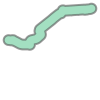

In [93]:
# 1 grad sind ca 111km => entfernung von 1km = 0.01
pb.buffer(.02)

In [96]:
m = MultiPoint(list(zip(gas_stations_df['Long'],gas_stations_df['Lat'])))

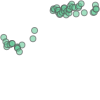

In [101]:
pb.buffer(.02).intersection(m)

Keep a data set that is indexed by postion

In [110]:
def hash_pos(lat,long):
    return str(lat) + ':' + str(long)

In [108]:
gas_station_pos_index = gas_stations_df.copy()

In [117]:
gas_station_pos_index['str_pos'] = gas_station_pos_index.apply(lambda row: hash_pos(row.Lat,row.Long), axis=1)
gas_station_pos_index = gas_station_pos_index.reset_index().set_index('str_pos')

In [119]:
gas_stations_near_path = [hash_pos(point.y,point.x) for point in pb.buffer(.02).intersection(m) ]

In [124]:
gas_station_pos_index.loc[gas_stations_near_path]['id']

str_pos
52.4087:13.0767                          3089
52.392309999999995:13.084541999999999    3136
52.374109999999995:13.0881519            3191
52.382195:13.089295                      3167
52.3816:13.1003                          3168
52.3860855:13.1066551                    3158
52.3858:13.108893                        3159
52.3734:13.1274                          3196
52.3709:13.127820000000002               3203
52.36785:13.128570000000002              3210
52.35516:13.135243                       3249
52.3805:13.1449                          3172
52.40376304:13.18561031                  3103
52.434509999999996:13.191629999999998    2958
52.508357999999994:13.260575             2747
52.515099:13.2623                        2721
52.513645200000006:13.266035999999998    2729
52.51914:13.27455                        2704
52.5103:13.2774                          2740
52.502090939986:13.279815263678          2768
52.5096:13.281325299999999               2744
52.494197:13.2848730000000

### Find the point on the path closest to a gas station

In [128]:
gas_stations = pb.buffer(.02).intersection(m) 

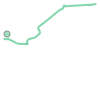

In [130]:
gas_stations[0].union(pb)

In [160]:
def closest_point_on_path(path,point):
    return path.interpolate(path.project(point))

In [171]:
def length_on_line(path,point):
    return path.project(point,normalized=True)

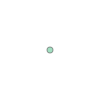

In [161]:
closest_point_on_path(pb,gas_stations[0])

In [144]:
length_on_line(pb,gas_stations[0])

0.014539218144702744

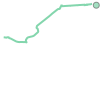

In [145]:
gas_stations[-1].union(pb)

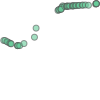

In [166]:
MultiPoint([closest_point_on_path(pb,p) for p in gas_stations])

In [170]:
pb.length * 111

48.64652503376126

In [172]:
[length_on_line(pb,p) for p in gas_stations]

[0.03317509756230217,
 0.04398314398674996,
 0.07233871392026928,
 0.06340775367769388,
 0.08851714672099506,
 0.09652536335935019,
 0.10134096518155544,
 0.15528013823321749,
 0.1561686348105384,
 0.15782465444082366,
 0.17279256718818564,
 0.23818489142774676,
 0.34159266718690634,
 0.430159214757942,
 0.656403842500133,
 0.6652161979888852,
 0.6666721019596518,
 0.7155297445485758,
 0.7000620070461838,
 0.6873371981814669,
 0.7031974775884352,
 0.6827723006849263,
 0.6843570821207778,
 0.7372820103050105,
 0.7540553588717224,
 0.7554454600813043,
 0.7545867767976714,
 0.759328520993486,
 0.7700498391793931,
 0.7780949740539697,
 0.8008548773087076,
 0.796691788664242,
 0.8042445537015868,
 0.8100174903302682,
 0.822947513994339,
 0.8301271866203009,
 0.8476612655795118,
 0.8555298200369696,
 0.8792659560661253,
 0.8841827164744883,
 0.9041252735733847,
 0.9325296960357782,
 0.9931597051743023,
 1.0,
 1.0,
 1.0,
 1.0]